In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('data/AirPass.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [4]:
is_null_sum = df.isnull().sum().sum()
print(f"Number of nulls - {is_null_sum}")

Number of nulls - 310


In [5]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [7]:
mean_value = df['Arrival Delay in Minutes'].mean()
print(f"Mean value - {mean_value:.3f}")

Nean value - 15.133


In [14]:
pivit_table_of_satisfaction = pd.pivot_table(df, 'id', index='Gender', columns='satisfaction', aggfunc='count')
pivit_table_of_satisfaction

satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,30193,22534
Male,28686,22491


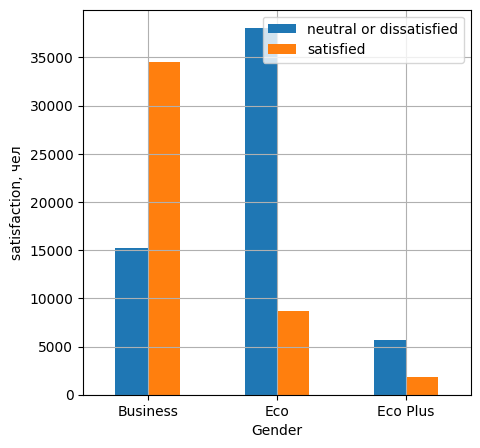

In [50]:
_, axies = plt.subplots(figsize=(5, 5))
pivit_table_of_satisfaction.plot(kind='bar', ax=axies)
axies.set_ylabel('satisfaction, чел')
axies.set_xlabel('Gender')
plt.xticks(rotation = 0) 
axies.legend(loc="upper right")
axies.grid()

In [15]:
pivit_table_of_type_of_travel = pd.pivot_table(df, 'id', index='Type of Travel', columns='satisfaction', aggfunc='count')
pivit_table_of_type_of_travel

satisfaction,neutral or dissatisfied,satisfied
Type of Travel,,
Business travel,29909,41746
Personal Travel,28970,3279


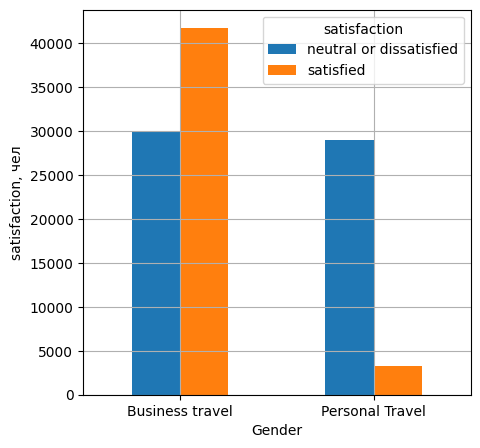

In [51]:
_, axies = plt.subplots(figsize=(5, 5))
pivit_table_of_type_of_travel.plot(kind='bar', ax=axies)
axies.set_ylabel('satisfaction, чел')
axies.set_xlabel('Gender')
plt.xticks(rotation = 0) 
axies.grid()

In [17]:
pivit_table_of_satisfaction = pd.pivot_table(df, 'id', index='Class', columns='satisfaction', aggfunc='count')
pivit_table_of_satisfaction

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,15185,34480
Eco,38044,8701
Eco Plus,5650,1844


<Axes: title={'center': 'Satisfied'}, ylabel='satisfied'>

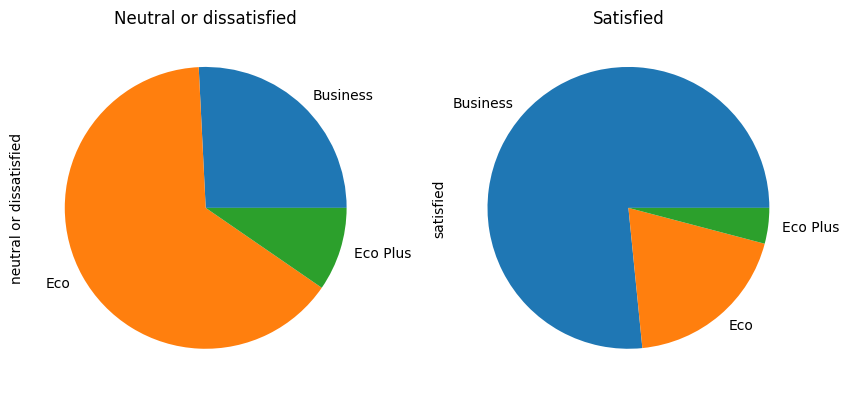

In [52]:
_, axies = plt.subplots(figsize=(10, 5), nrows=1, ncols=2,)
pivit_table_of_satisfaction['neutral or dissatisfied'].plot(kind='pie', ax=axies[0], title="Neutral or dissatisfied")
pivit_table_of_satisfaction['satisfied'].plot(kind='pie', ax=axies[1], title="Satisfied")

In [20]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [21]:
df = pd.get_dummies(df)
len(df.columns)

26

In [24]:
train_df = df.drop('satisfaction', axis=1)
test_df = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(train_df, test_df, random_state=26, train_size=0.8)
X_test.shape

(20781, 25)

In [25]:
std = StandardScaler()
std.fit(X_train)

StandardScaler()

In [27]:
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)

/home/ivan/Desktop/Python Projects/SF_lessons/venv/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/ivan/Desktop/Python Projects/SF_lessons/venv/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
print(f"{X_test[0, 0]:.3f}")

0.941


In [33]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [34]:
lr_predicted = lr_model.predict(X_test)
f1_score_value = f1_score(y_test, lr_predicted)
print(f"F1-score - {f1_score_value:.3f}")

F1-score - 0.855


In [35]:
ab_model = AdaBoostClassifier(DecisionTreeClassifier(random_state=26), random_state=26, learning_rate=0.01)
ab_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=26),
                   learning_rate=0.01, random_state=26)

In [36]:
ab_predicted = ab_model.predict(X_test)
f1_score_value = f1_score(y_test, ab_predicted)
print(f"F1-score - {f1_score_value:.3f}")

F1-score - 0.940


In [37]:
params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}
model_for_gs = GradientBoostingClassifier()

greed_search = GridSearchCV(model_for_gs, param_grid=params, cv=3, scoring=make_scorer(f1_score))
greed_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([1.  , 0.1 , 0.01]),
                         'n_estimators': array([  1,   2,   4,   8,  16,  32,  64, 128])},
             scoring=make_scorer(f1_score))

In [40]:
print(f"Best params - {greed_search.best_params_}")
print(f"Best score - {greed_search.best_score_:.2f}")

Best params - {'learning_rate': 1.0, 'n_estimators': 128}
Best score - 0.95


In [41]:
xgb_model = XGBClassifier(random_state=26)
cat_model = CatBoostClassifier(random_state=26)

In [42]:
xgb_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)
xgb_predicted = xgb_model.predict(X_test)
cat_predicted = cat_model.predict(X_test)

Learning rate set to 0.068023
0:	learn: 0.6018151	total: 60ms	remaining: 60s
1:	learn: 0.5020758	total: 69.2ms	remaining: 34.5s
2:	learn: 0.4472471	total: 75.7ms	remaining: 25.2s
3:	learn: 0.4028689	total: 81.7ms	remaining: 20.3s
4:	learn: 0.3674734	total: 87.2ms	remaining: 17.4s
5:	learn: 0.3397847	total: 91.7ms	remaining: 15.2s
6:	learn: 0.3121211	total: 96ms	remaining: 13.6s
7:	learn: 0.2917500	total: 101ms	remaining: 12.5s
8:	learn: 0.2749040	total: 105ms	remaining: 11.6s
9:	learn: 0.2575190	total: 109ms	remaining: 10.8s
10:	learn: 0.2473691	total: 113ms	remaining: 10.2s
11:	learn: 0.2377533	total: 117ms	remaining: 9.65s
12:	learn: 0.2279311	total: 121ms	remaining: 9.2s
13:	learn: 0.2212511	total: 125ms	remaining: 8.81s
14:	learn: 0.2100357	total: 129ms	remaining: 8.48s
15:	learn: 0.2025732	total: 133ms	remaining: 8.2s
16:	learn: 0.1942300	total: 138ms	remaining: 7.96s
17:	learn: 0.1877937	total: 142ms	remaining: 7.73s
18:	learn: 0.1832380	total: 146ms	remaining: 7.54s
19:	learn: 0

In [43]:
xgb_f1 = f1_score(y_test, xgb_predicted)
cat_f1 = f1_score(y_test, cat_predicted)

print(f"F1-score of XGBClassifier - {xgb_f1:.3f}")
print(f"F1-score of CatBoostClassifier - {cat_f1:.3f}")

F1-score of XGBClassifier - 0.958
F1-score of CatBoostClassifier - 0.960


In [44]:
confusion_matrix(y_test, cat_predicted)

array([[11432,   241],
       [  471,  8637]])

In [45]:
get_confusion_matrix(cat_model, Pool(X_train, y_train))

array([[46647.,   559.],
       [ 1273., 34644.]])

In [46]:
pd.DataFrame(
    {
        "feature_importance": cat_model.get_feature_importance(),
        "feature_names": df.drop(columns="satisfaction").columns,
    }
).sort_values(by=["feature_importance"], ascending=False)

,feature_importance,feature_names
6,26.001691,Inflight wifi service
4,17.854438,Type of Travel
11,7.582693,Online boarding
2,7.291082,Customer Type
22,5.334009,Class_Business
17,3.935882,Checkin service
16,3.675108,Baggage handling
3,3.653960,Age
9,3.537978,Gate location
18,2.840194,Inflight service
